# Text Mining
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 



In [1]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Elon_musk.csv",encoding='unicode_escape')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df=df.drop(columns=('Unnamed: 0'),axis=1)
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


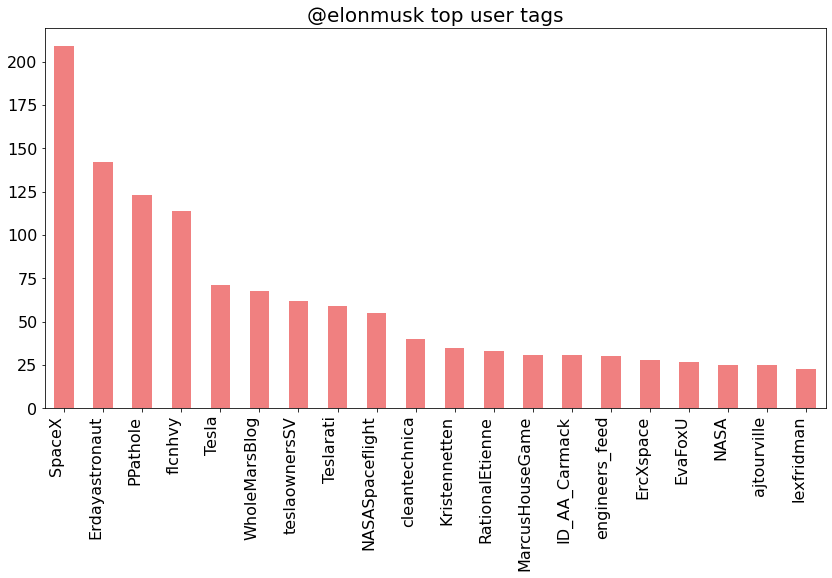

In [7]:
import itertools
import matplotlib.pyplot as plt
c = list(itertools.chain(*df.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

In [8]:
#Remove space and symbol
df.Text=df.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))
df

,Text
0,kunalb Im an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...
...,...
1994,flcnhvy True it sounds so surreal but the nega...
1995,PPathole Make sure to read ur terms amp condit...
1996,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is UFUF


In [9]:
#Make lower test
df.Text=df.Text.apply(lambda x: x.lower())
df

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is ufuf


In [10]:
#Splitting the words
df.Text=df.Text.apply(lambda x: x.split())
df

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


In [11]:
#Stop words removing
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\AANANTHA PRIYA S
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
df.Text=df.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])
df

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, underestimated]"
4,"[teslacn, congratulations, tesla, china, amazi..."
...,...
1994,"[flcnhvy, true, sounds, surreal, negative, pro..."
1995,"[ppathole, make, sure, read, ur, terms, amp, c..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, dumber, ufuf]"


In [14]:
#Stemming
ps = PorterStemmer()  
df.Text=df.Text.apply(lambda x: [ps.stem(word) for word in x])
df

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, trace, cyberpunk, hdr, next..."
2,"[joerogan, spotifi, great, interview]"
3,"[gtera, doge, underestim]"
4,"[teslacn, congratul, tesla, china, amaz, execu..."
...,...
1994,"[flcnhvi, true, sound, surreal, neg, propagand..."
1995,"[ppathol, make, sure, read, ur, term, amp, con..."
1996,"[teslagong, ppathol, samwis, gamge]"
1997,"[ppathol, altho, dumb, dumber, ufuf]"


In [15]:
#Rejoining
df.Text=df.Text.apply(lambda x: " ".join(x))
df

,Text
0,kunalb im alien
1,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut last...
...,...
1994,flcnhvi true sound surreal neg propaganda stil...
1995,ppathol make sure read ur term amp condit clic...
1996,teslagong ppathol samwis gamge
1997,ppathol altho dumb dumber ufuf


In [16]:
from textblob import TextBlob
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['Text','sentiment']].head()

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


In [20]:
#Word Frequency after Removal of Stopwords
freq_stp = pd.Series(' '.join(df['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             249
amp                218
tesla              170
erdayastronaut     142
rt                 127
ppathol            123
flcnhvi            114
ye                  87
great               76
teslaownerssv       73
wholemarsblog       68
launch              63
teslarati           59
engin               58
nasaspaceflight     55
haha                55
need                52
good                52
like                51
make                51
dtype: int64

In [22]:
#Count vectoriser tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aber,1,0.000070
1,abl,6,0.000418
2,abo,1,0.000070
3,aboard,1,0.000070
4,abort,3,0.000209
5,absenc,1,0.000070
6,absolut,16,0.001115
7,absorb,1,0.000070
8,absorpt,1,0.000070
9,absurd,2,0.000139


In [23]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
data = pd.DataFrame(denselist, columns = names_features)
data

,abl,abort,absolut,acceler,accept,access,accur,achiev,actual,ad,...,yahoofin,ye,yeah,year,yesterday,yourfavga,yup,zainraz,zero,zone
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.329704,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.439451,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# Bi-gram

In [24]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
top2_words = get_top_n2_words(df["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,crew dragon,14
4,pretti much,12
5,rt nasa,12
6,falcon launch,11
7,spacex crew,11
8,waemd spacex,11
9,giga berlin,10


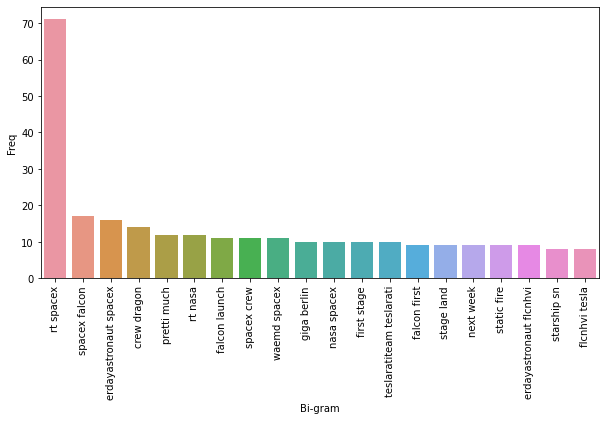

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

# Tri-gram

In [28]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [30]:
top3_words = get_top_n3_words(df["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,first stage land,9
3,spacex falcon first,8
4,thesheetztweetz waemd spacex,8
5,jgrano teslaratiteam teslarati,8
6,cours still love,7
7,ppathol thesheetztweetz waemd,7
8,waemd spacex spacexstarlink,7
9,spacex falcon launch,6


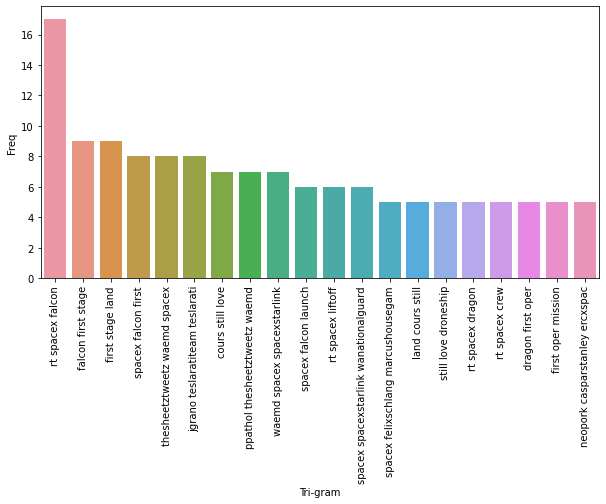

In [31]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Creating a Worlcloud

In [33]:
string_Total = " ".join(df["Text"])

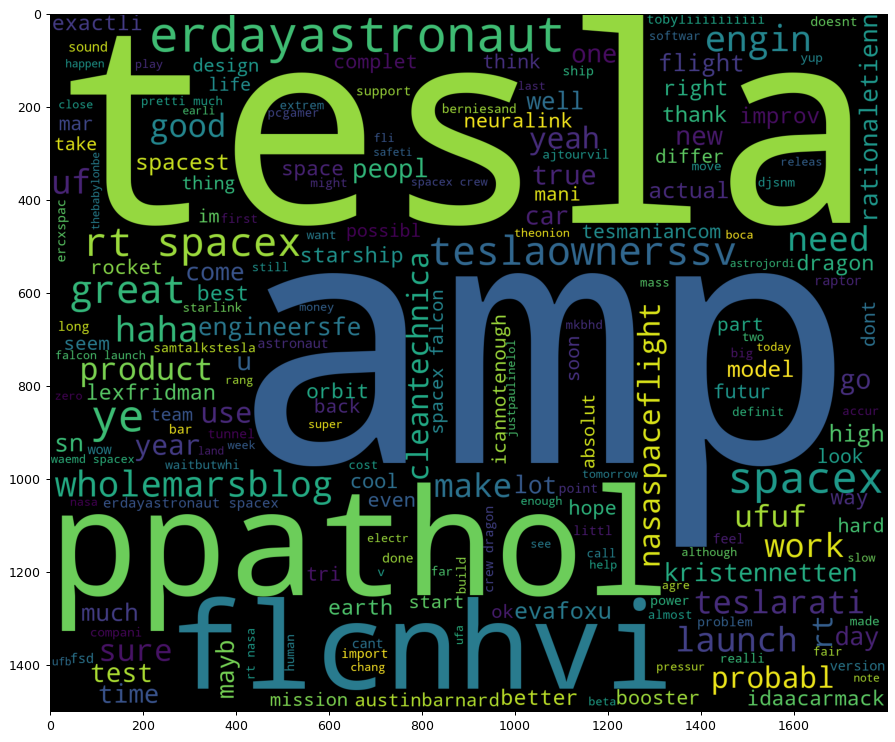

In [34]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

In [37]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df.head(11)

,Text,sentiment,subjectivity,polarity
0,kunalb im alien,-0.250000,0.750000,-0.250000
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,0.000000,0.000000
2,joerogan spotifi great interview,0.800000,0.750000,0.800000
3,gtera doge underestim,0.000000,0.000000,0.000000
4,teslacn congratul tesla china amaz execut last...,0.000000,0.033333,0.000000
5,happi new year ox httpstcowfkmyuoj,0.136364,0.454545,0.136364
6,frodo underdogeal thought would failhimself ht...,0.000000,0.000000,0.000000
7,owenspark flcnhvi anonyx haha thank,0.200000,0.300000,0.200000
8,flcnhvi anonyx inde tweet definit repres realw...,0.000000,0.000000,0.000000
9,entertain outcom like,0.000000,0.000000,0.000000


# Creating a Worlcloud

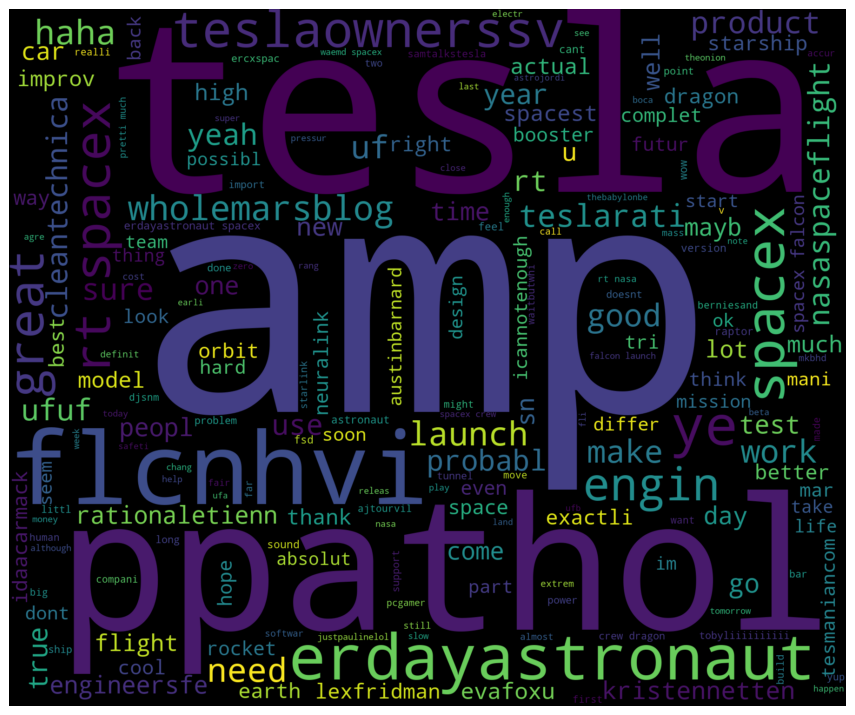

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [40]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [43]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)

In [44]:
positive_tweets = df[df['analysis'] == 'Positive']
negative_tweets = df[df['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotifi great interview
 -happi new year ox httpstcowfkmyuoj
 -owenspark flcnhvi anonyx haha thank
 -geoffkeighley unrealengin get real
 -joshmanmod definit issu sentenc seem bit high
negative tweets
 -kunalb im alien
 -rationaletienn adamklotz starlink staggeringli difficult technic amp econom endeavor howev httpstcozacskqx
 -madoverlord dumb
 -tough one httpstcobeypefpcj
 -rt spacex mission enabl access everyday peopl dream go space


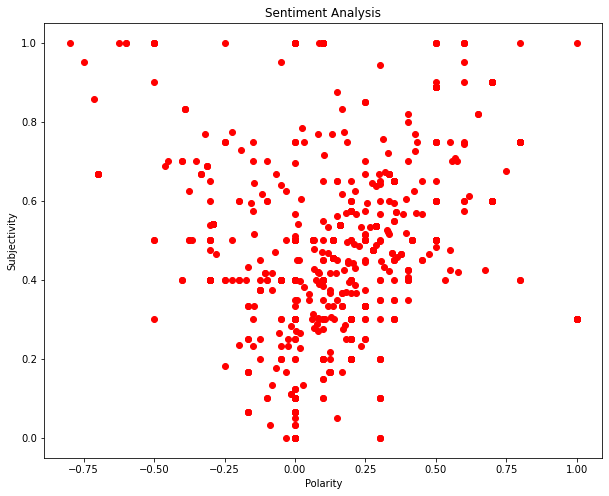

In [45]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [46]:
(len(positive_tweets) / len(negative_tweets))*100

403.10559006211184

Colclusion: Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.

TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

 AMAZON PRODUCT
 
SUPCASE Thermoplastic Polyurethane Unicorn Beetle Series Case for Samsung Galaxy A53 5G 2022, Slim Rugged Shockproof Protective Case with Built-in Kickstand (Black)


In [47]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
link='https://www.amazon.in/SUPCASE-Unicorn-Shockproof-Protective-Kickstand/product-reviews/B09QCJCW8L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [49]:
# Getting reviews of first five pages
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/SUPCASE-Unicorn-Shockproof-Protective-Kickstand/product-reviews/B09QCJCW8L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/SUPCASE-Unicorn-Shockproof-Protective-Kickstand/product-reviews/B09QCJCW8L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/SUPCASE-Unicorn-Shockproof-Protective-Kickstand/product-reviews/B09QCJCW8L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/SUPCASE-Unicorn-Shockproof-Protective-Kickstand/product-reviews/B09QCJCW8L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/SUPCASE-Unicorn-Shockproof-Protective-Kickstand/product-reviews/B09QCJCW8L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/SUPCASE-Unicorn-Shockproof-Protective-Kickstand/product-reviews/B09QCJCW8L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType

In [50]:
review_list

['Value for money, sturdy and serves purpose',
 'I bought this case based on reviews. My phone slipped out of my pocket from the 3rd floor and the phone fell to the ground. The phone survived with absolutely no damage, the  back kick stand took some damage.This case is amazing and saved my phone.',
 "A bit bulky but when it's come to protection this is just a beast.",
 "I usually by Otterbox cases for my phones, because of the quality and protection, but could not find one I wanted for a decent price. I'm kinda rough on phones, so cases matter.to me, and was hesitant about trying an unfamiliar company.Absolutely no regrets about getting this case after a month of ownership.It's slim, lightweight, easy to hold, easy to slip in and out of pockets, well built, and looks good too. Never had a case with a kickstand, and this one is nice, I especially like how I can use it while in-hand.The only, issue I've had, was the fit wad tight, and it allowed my film screen cover to come up on one edg

In [51]:
len(review_list)

10

In [52]:
rv=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
rv

,Reviews
0,"Value for money, sturdy and serves purpose"
1,"I bought this case based on reviews. My phone slipped out of my pocket from the 3rd floor and the phone fell to the ground. The phone survived with absolutely no damage, the back kick stand took some damage.This case is amazing and saved my phone."
2,A bit bulky but when it's come to protection this is just a beast.
3,"I usually by Otterbox cases for my phones, because of the quality and protection, but could not find one I wanted for a decent price. I'm kinda rough on phones, so cases matter.to me, and was hesitant about trying an unfamiliar company.Absolutely no regrets about getting this case after a month of ownership.It's slim, lightweight, easy to hold, easy to slip in and out of pockets, well built, and looks good too. Never had a case with a kickstand, and this one is nice, I especially like how I can use it while in-hand.The only, issue I've had, was the fit wad tight, and it allowed my film screen cover to come up on one edge. (That was probably more of my instalation of the film, than the cases fault, because after re-installing a new film cover, I've had no more issues with it.)All-in-all..."
4,"These cases are incredible! I had one for 3+ years on a Google phone & it never broke! It was dropped many 1000 times, down stairs, thrown across rooms (I have 4 kids 😂) & it NEVER failed me...ever!!!!! My family ok, my kids & me especially really put this to the ultimate tests. It never disappointed me. I will saymy front cover looked a weeeeee rough from the insanity it was dealt...but my phone was perfect! So I bought this one for my husband's new phone & one for my new iphone 14pro... already dropped it on tile floors, concrete & more times than I'd like to admit to in the last few weeks.*I tried a dropcase on my new iphone14 thinking hey they'll refund you if your phone breaks ...um four days in & with only a 2foot drop the screen protector was BROKEN & the side was chipped... imm..."
5,"Fits the phone well, the buttons are easy to push on the side, it's seems to be very sturdy. The stand is convenient, but difficult to open without prying it with something like a key."
6,the stand works ok ... not the best but good enough
7,I purchased this Supcase Unicorn Beetle for my new Samsung Galaxy A53 5G. I selected this version Unicorn Beetle because I don't need the additional screen protector or belt clip featured on the more expensive Unicorn Beetle Pro. I already have screen protection film on my phone. After 10 days of use I'm very pleased with this case. The Unicorn Beetle is very well made and easy to install. Slip the A53 camera end first into the case. The fit on the A53 is snug all around. Nothing loose. The side bumpers are raised enough to provide protection with the phone screen down on a flat surface. Excellent camera protection. The kickstand is a useful feature when needed. It looks like there is plenty of cushioning to provide drop protection. As mentioned in another review the descriptive photos...
8,"The case is great and it has definitely saved my phone from my clumsiness. The kickstand broke pretty easily, but I personally do not use it much anyway."
9,It's on an accident prone teens phone and the phone is still in perfect condition despite having shattered multiple screen protectors lol


In [53]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\AANANTHA PRIYA S
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
ps=PorterStemmer()

In [56]:
def rvpreprocess(x):
         x=re.sub('[^a-zA-Z ]', "", x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [57]:
rv["Reviews"]=rv["Reviews"].apply(rvpreprocess)

In [58]:
rv.head()

,Reviews
0,valu money sturdi serv purpos
1,bought case base review phone slip pocket rd floor phone fell ground phone surviv absolut damag back kick stand took damagethi case amaz save phone
2,bit bulki come protect beast
3,usual otterbox case phone qualiti protect could find one want decent price im kinda rough phone case matterto hesit tri unfamiliar companyabsolut regret get case month ownershipit slim lightweight easi hold easi slip pocket well built look good never case kickstand one nice especi like use inhandth issu ive fit wad tight allow film screen cover come one edg probabl instal film case fault reinstal new film cover ive issu itallinal great new phone case n great price would definit rec
4,case incred one year googl phone never broke drop mani time stair thrown across room kid never fail meever famili ok kid especi realli put ultim test never disappoint saymi front cover look weeeeee rough insan dealtbut phone perfect bought one husband new phone one new iphon pro alreadi drop tile floor concret time id like admit last weeksi tri dropcas new iphon think hey theyll refund phone break um four day foot drop screen protector broken side chip immedi look return junk buy anoth unicorn beetl sup case ill never tri differ case help


In [59]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


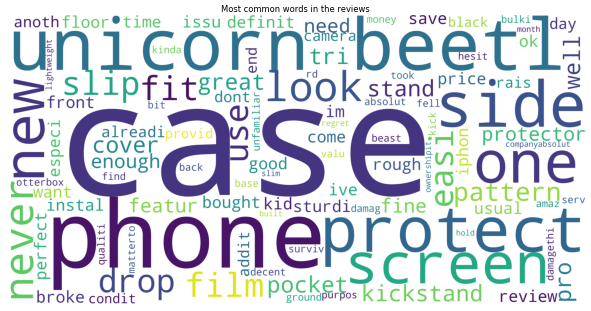

In [60]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=4000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(rv['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

# Sentiment Analysis

In [61]:
from textblob import TextBlob
rv['sentiment_score'] = rv['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
rv[['Reviews','sentiment_score']].head()

,Reviews,sentiment_score
0,valu money sturdi serv purpos,0.000000
1,bought case base review phone slip pocket rd floor phone fell ground phone surviv absolut damag back kick stand took damagethi case amaz save phone,-0.400000
2,bit bulki come protect beast,0.000000
3,usual otterbox case phone qualiti protect could find one want decent price im kinda rough phone case matterto hesit tri unfamiliar companyabsolut regret get case month ownershipit slim lightweight easi hold easi slip pocket well built look good never case kickstand one nice especi like use inhandth issu ive fit wad tight allow film screen cover come one edg probabl instal film case fault reinstal new film cover ive issu itallinal great new phone case n great price would definit rec,0.291893
4,case incred one year googl phone never broke drop mani time stair thrown across room kid never fail meever famili ok kid especi realli put ultim test never disappoint saymi front cover look weeeeee rough insan dealtbut phone perfect bought one husband new phone one new iphon pro alreadi drop tile floor concret time id like admit last weeksi tri dropcas new iphon think hey theyll refund phone break um four day foot drop screen protector broken side chip immedi look return junk buy anoth unicorn beetl sup case ill never tri differ case help,0.115909


In [62]:
## Defining function to assign sentiment category based on sentiment_score
## Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [63]:
rv['sentiment'] = rv['sentiment_score'].apply(lambda x:sentiment_category(x))

In [64]:
rv.head()

,Reviews,sentiment_score,sentiment
0,valu money sturdi serv purpos,0.000000,Neutral
1,bought case base review phone slip pocket rd floor phone fell ground phone surviv absolut damag back kick stand took damagethi case amaz save phone,-0.400000,Neutral
2,bit bulki come protect beast,0.000000,Neutral
3,usual otterbox case phone qualiti protect could find one want decent price im kinda rough phone case matterto hesit tri unfamiliar companyabsolut regret get case month ownershipit slim lightweight easi hold easi slip pocket well built look good never case kickstand one nice especi like use inhandth issu ive fit wad tight allow film screen cover come one edg probabl instal film case fault reinstal new film cover ive issu itallinal great new phone case n great price would definit rec,0.291893,Neutral
4,case incred one year googl phone never broke drop mani time stair thrown across room kid never fail meever famili ok kid especi realli put ultim test never disappoint saymi front cover look weeeeee rough insan dealtbut phone perfect bought one husband new phone one new iphon pro alreadi drop tile floor concret time id like admit last weeksi tri dropcas new iphon think hey theyll refund phone break um four day foot drop screen protector broken side chip immedi look return junk buy anoth unicorn beetl sup case ill never tri differ case help,0.115909,Neutral


In [65]:
# calculating the categories of sentiments and their counts
rv['sentiment'].value_counts()

Neutral     8
Positive    2
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

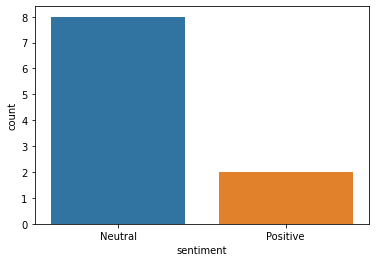

In [66]:
sns.countplot(x=rv['sentiment'])